### Peeraya Khantaruangsakul 63070501054

### 1. [20 points. 1 hour.] Change the CNN MNIST Google Colab to have 2 Convolutional layers before flattening instead of just 1. Also, add a softmax layer to the end. Run for 5 epochs. Show the confusion matrix for the test data. What is your test accuracy?

In [1]:
import tensorflow as tf
import karas
print("TensorFlow version:", tf.__version__)

from keras.layers import Dense, Flatten, Conv2D
from keras import Model

TensorFlow version: 2.14.0-dev20230601


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

In [3]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [4]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu') #32 convolution layers (each 3x3x3) on 28x28x3 input images
    self.conv2 = Conv2D(64, 3, activation='relu') #64 convolution layers (each 3x3x32) on 26x26x32 input images
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10)
    # softmax
    self.softmax = tf.keras.layers.Softmax()

  def call(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.flatten(x)
    x = self.d1(x)
    x = self.softmax(x)
    return self.d2(x)

# Create an instance of the model
model = MyModel()

In [5]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

In [6]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [7]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [8]:
@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [9]:
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

Epoch 1, Loss: 1.2576712369918823, Accuracy: 75.09500122070312, Test Loss: 0.7138893008232117, Test Accuracy: 78.91999816894531
Epoch 2, Loss: 0.5438258051872253, Accuracy: 78.9749984741211, Test Loss: 0.42711207270622253, Test Accuracy: 80.01000213623047
Epoch 3, Loss: 0.397214412689209, Accuracy: 79.79500579833984, Test Loss: 0.3709734082221985, Test Accuracy: 80.18000030517578
Epoch 4, Loss: 0.3458764851093292, Accuracy: 80.7550048828125, Test Loss: 0.33715108036994934, Test Accuracy: 84.72000122070312
Epoch 5, Loss: 0.23029683530330658, Accuracy: 89.6483383178711, Test Loss: 0.2034592181444168, Test Accuracy: 89.9000015258789


### 2 [20 points. 1 hour.] Use the Yolo colab on your own image you took and a video you took. In each at least 3 objects should be visible. Were they detected?

In [10]:
from imageai.Detection import VideoObjectDetection, ObjectDetection
import matplotlib as plt
import tensorflow as tf
import numpy as np
import scipy
import keras
import h5py
import os

In [11]:
#Test images
#for more details imageai manual: https://imageai.readthedocs.io/en/latest/
execution_path = '../Quiz11'
detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
#Uses pretrained models trained on the COCO dataset
detector.setModelPath( os.path.join(execution_path , "yolov3.pt"))
detector.loadModel()
input_file = os.path.join(execution_path , "img_test.jpg")
#input_file = os.path.join(execution_path , "5.jpg")
output_file = os.path.join(execution_path , "img_output.jpg")
detections = detector.detectObjectsFromImage(input_image=input_file, output_image_path=output_file, minimum_percentage_probability=30)

In [12]:
#Test videos
execution_path = '../Quiz11'
detector = VideoObjectDetection()
detector.setModelTypeAsYOLOv3()
#Uses pretrained models trained on the COCO dataset
detector.setModelPath( os.path.join(execution_path , "yolov3.pt"))
detector.loadModel()
input_file = os.path.join(execution_path , "vdo_test.mp4")
output_file = os.path.join(execution_path , "vdo_output")
video_path = detector.detectObjectsFromVideo(input_file_path=input_file,
  output_file_path=output_file,
  frames_per_second=29, log_progress=True)

Processing Frame :  1
Processing Frame :  2
Processing Frame :  3
Processing Frame :  4
Processing Frame :  5
Processing Frame :  6
Processing Frame :  7
Processing Frame :  8
Processing Frame :  9
Processing Frame :  10
Processing Frame :  11
Processing Frame :  12
Processing Frame :  13
Processing Frame :  14
Processing Frame :  15
Processing Frame :  16
Processing Frame :  17
Processing Frame :  18
Processing Frame :  19
Processing Frame :  20
Processing Frame :  21
Processing Frame :  22
Processing Frame :  23
Processing Frame :  24
Processing Frame :  25
Processing Frame :  26
Processing Frame :  27
Processing Frame :  28
Processing Frame :  29
Processing Frame :  30
Processing Frame :  31
Processing Frame :  32
Processing Frame :  33
Processing Frame :  34
Processing Frame :  35
Processing Frame :  36
Processing Frame :  37
Processing Frame :  38
Processing Frame :  39
Processing Frame :  40
Processing Frame :  41
Processing Frame :  42
Processing Frame :  43
Processing Frame :  

### 3. [40 points. 4 hours] Using a Recurrent Neural Network of your choice, create a predictor for the next time frame. Show how well your training fit actually meets the data. What is your prediction error on the test set?

**Example:**

● Recurrent Neural Network Model: plain RNN, LSTM, or other RNN

● Timeframe: Daily, hourly, per minute, or …

● Dataset:

        ○ Commodity Dataset: SET index, Price ofPTT Stock, USD Exchange, Gold, …
        ○ Train/Test Dataset: MSFT stock, Kaggle Currency, …

##### import libraries

Use this dataset : https://www.kaggle.com/datasets/dhruvildave/currency-exchange-rates

In [13]:
# use Rnns and LSTMs to predict the currency exchange rate
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

df = pd.read_csv('forex.csv')

##### EDA

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453035 entries, 0 to 1453034
Data columns (total 7 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   slug      1453035 non-null  object 
 1   date      1453035 non-null  object 
 2   open      1453035 non-null  float64
 3   high      1453035 non-null  float64
 4   low       1453035 non-null  float64
 5   close     1453035 non-null  float64
 6   currency  1453035 non-null  object 
dtypes: float64(4), object(3)
memory usage: 77.6+ MB


In [15]:
# convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])
# slug to str
df['slug'] = df['slug'].astype(str)
# sort the dataframe by date
df.sort_values(by='date', inplace=True, ascending=True)


In [16]:
df.tail()

,slug,date,open,high,low,close,currency
78736,INR/PKR,2021-08-30,2.252800,2.258000,2.240900,2.258000,PKR
1143649,GBP/HTG,2021-08-30,136.240005,136.365997,135.167007,135.391006,HTG
668024,INR/MYR,2021-08-30,0.056500,0.056500,0.056200,0.056200,MYR
1140121,GBP/KRW,2021-08-30,1596.430054,1604.819946,1596.020020,1603.239990,KRW
1453034,USD/MXN,2021-08-30,20.191999,20.224501,20.096001,20.135000,MXN


In [17]:
# keep date 2016 and after
df = df[df['date'] >= '2016-01-01']
df = df[df['slug'].str.contains('USD'+ '/')]

In [18]:
df.shape

(117761, 7)

In [19]:
# unique currencies
df['currency'].unique()

array(['HUF', 'UZS', 'SDG', 'RSD', 'IDR', 'DJF', 'GTQ', 'BWP', 'JPY',
       'XOF', 'MMK', 'CAD', 'EUR', 'CZK', 'SGD', 'MXN', 'ZAR', 'SLL',
       'BRL', 'CHF', 'VND', 'NOK', 'KRW', 'UAH', 'PGK', 'BGN', 'COP',
       'MZN', 'HKD', 'AUD', 'LKR', 'MKD', 'ISK', 'IQD', 'ETB', 'PKR',
       'TTD', 'CNY', 'GBP', 'KZT', 'RUB', 'PLN', 'NGN', 'QAR', 'MUR',
       'TRY', 'GHS', 'ILS', 'DKK', 'JMD', 'MWK', 'XPF', 'SZL', 'ARS',
       'SOS', 'UYU', 'BYN', 'SEK', 'AED', 'RON', 'BND', 'MDL', 'CRC',
       'HNL', 'PEN', 'MYR', 'TWD', 'ZMW', 'NIO', 'SAR', 'INR', 'TND',
       'THB', 'KWD', 'MAD', 'PHP', 'MGA', 'BDT', 'EGP', 'CLP', 'NZD'],
      dtype=object)

In [20]:
chose_curr = ['GBP', 'EUR', 'CAD', 'AUD', 'CHF', 'NZD']

# filter the dataframe to only include the currencies we want
df = df[df['currency'].isin(chose_curr)]

df.shape

(8724, 7)

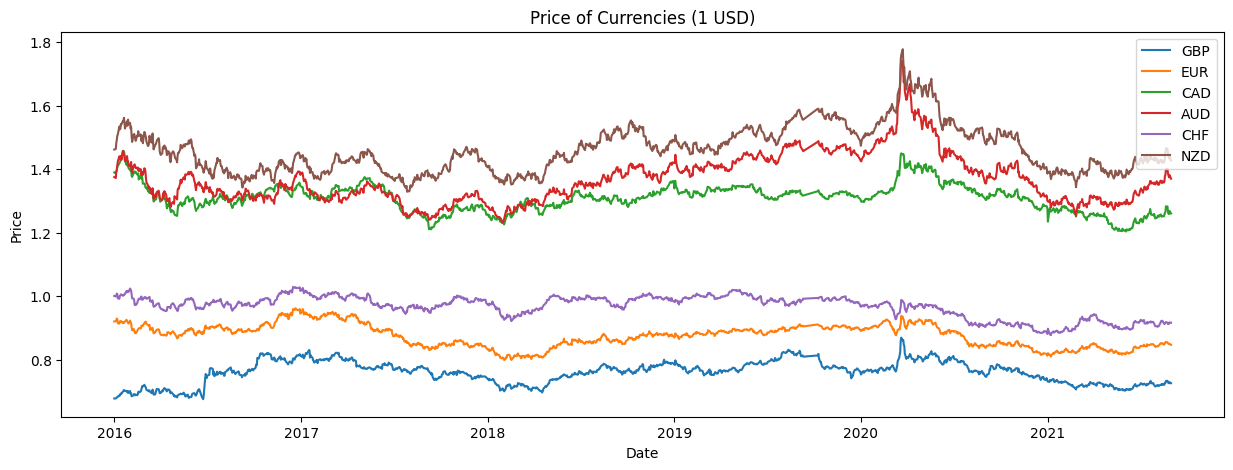

In [22]:
# plot the closing price of each currency
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
# x =date and y = close
for curr in chose_curr:
    plt.plot(df[df['currency'] == curr]['date'], df[df['currency'] == curr]['close'], label=curr)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price of Currencies (1 USD)')
plt.legend()
plt.show()

##### Prediction

In [23]:
# use RNNs and LSTMs to predict the currency exchange rate

# create a new dataframe with only the date and close columns where the currency is GBP
df_pre = df[df['currency'] == 'GBP']
df_pre = df[['date', 'close']]
df_pre.head()

,date,close
1151429,2016-01-01,1.38997
924759,2016-01-01,0.92089
1285193,2016-01-01,1.00136
1069909,2016-01-01,1.37520
275420,2016-01-01,0.67850


In [24]:
scaler = MinMaxScaler()
df_pre['price_scaled'] = scaler.fit_transform(df_pre[['close']])

# Split data into training and testing sets
train_size = int(len(df_pre) * 0.8)
train_data = df_pre[:train_size]
test_data = df_pre[train_size:]

# Convert data into input-output sequences
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        sequences.append(sequence)
    return np.array(sequences)

sequence_length = 3  # Adjust this value as needed
X_train = create_sequences(train_data['price_scaled'], sequence_length)
y_train = train_data['price_scaled'].values[sequence_length:]
X_test = create_sequences(test_data['price_scaled'], sequence_length)
y_test = test_data['price_scaled'].values[sequence_length:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

# Make predictions
predictions = model.predict(X_test)
predicted_values = scaler.inverse_transform(predictions)

# Print predicted values and actual values
for i in range(len(predicted_values)):
    print(f'Predicted: {predicted_values[i][0]}, Actual: {test_data["close"].values[i+sequence_length]}')

C:\Users\USER\AppData\Local\Temp\ipykernel_30772\1040713741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['price_scaled'] = scaler.fit_transform(df_pre[['close']])


Epoch 1/50
218/218 [==============================] - 1s 2ms/step - loss: 0.0921
Epoch 2/50
218/218 [==============================] - 0s 2ms/step - loss: 0.0597
Epoch 3/50
218/218 [==============================] - 0s 2ms/step - loss: 0.0578
Epoch 4/50
218/218 [==============================] - 0s 2ms/step - loss: 0.0573
Epoch 5/50
218/218 [==============================] - 0s 2ms/step - loss: 0.0574
Epoch 6/50
218/218 [==============================] - 0s 2ms/step - loss: 0.0572
Epoch 7/50
218/218 [==============================] - 0s 2ms/step - loss: 0.0573
Epoch 8/50
218/218 [==============================] - 0s 2ms/step - loss: 0.0569
Epoch 9/50
218/218 [==============================] - 0s 2ms/step - loss: 0.0571
Epoch 10/50
218/218 [==============================] - 0s 2ms/step - loss: 0.0569
Epoch 11/50
218/218 [==============================] - 0s 2ms/step - loss: 0.0568
Epoch 12/50
218/218 [==============================] - 0s 2ms/step - loss: 0.0568
Epoch 13/50
218/218 [====

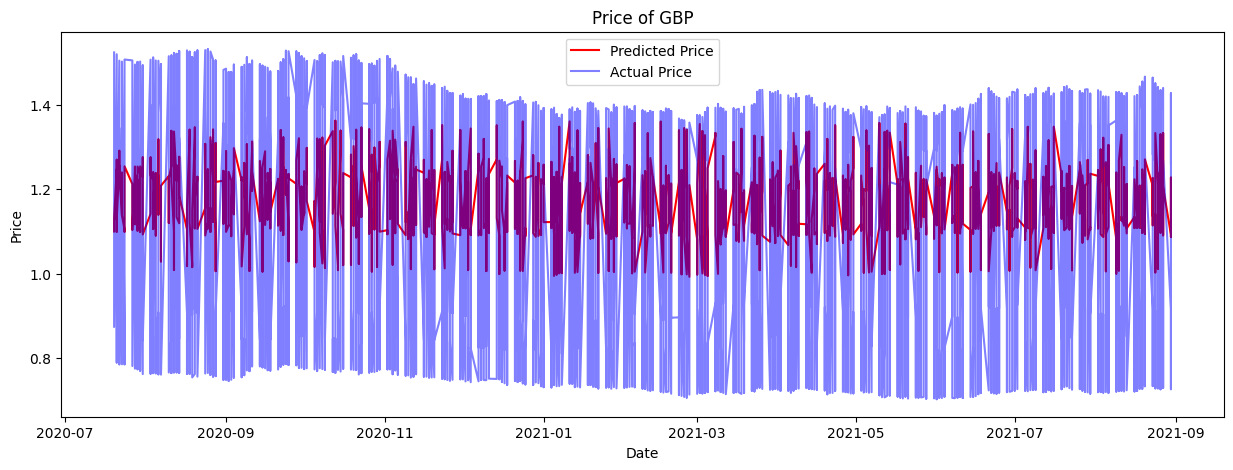

In [25]:
# Plotting the predicted values and actual values
plt.figure(figsize=(15, 5))
plt.plot(test_data['date'][sequence_length:], predicted_values, color='red', label='Predicted Price')
plt.plot(test_data['date'][sequence_length:], test_data['close'][sequence_length:], color='blue', label='Actual Price', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price of GBP')
plt.legend()
plt.show()
